In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
x = np.arange(-5,5,0.01)

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0,x)

def leaky_relu(x, alpha=0.1):
    y = np.zeros_like(x)
    y = np.maximum(0,x) + alpha * np.minimum(0,x)
    return y

def maxout(x_0, x_1):
    assert x_0.shape == x_1.shape
    return np.maximum(x_0, x_1)

def dsig_dx(x):
    return sigmoid(x) * (1 - sigmoid(x))

def dtanh_dx(x):
    return 1 - np.tanh(x)**2

def drelu_dx(x):
    y = np.zeros_like(x)
    y[x > 0] = 1.
    y[x<= 0] = 0.0
    return y

def dlrelu_dx(x, alpha=0.1):
    y = np.zeros_like(x)
    y[x > 0] = 1.
    y[x<= 0] = alpha
    return y

#test it
# print(sigmoid(1))
# print(sigmoid(np.array([0,1])))


In [4]:
sig_y = sigmoid(x)
dsig_y = dsig_dx(x)

tanh_y = tanh(x)
dtanh_y = dtanh_dx(x)

relu_y = relu(x)
drelu_y = drelu_dx(x)

lrelu_y = leaky_relu(x)
dlrelu_y = dlrelu_dx(x)

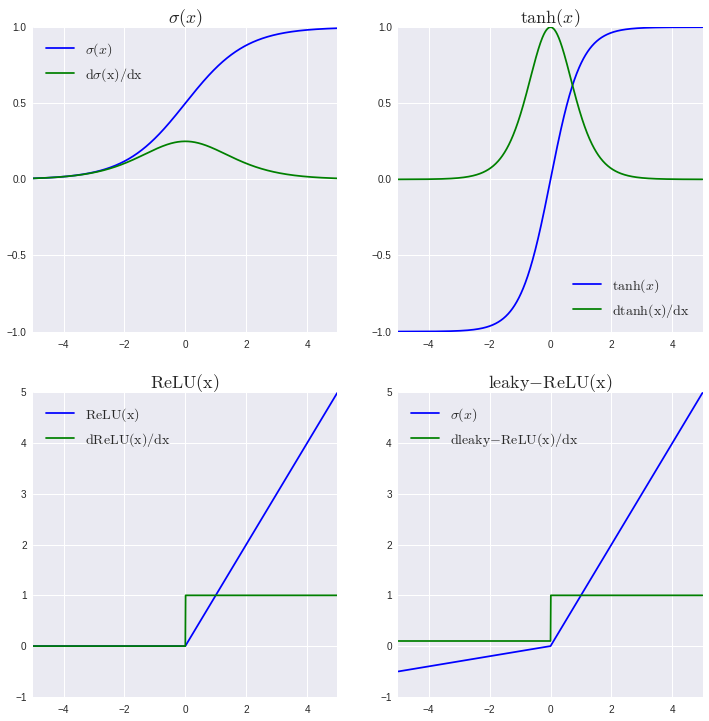

In [5]:
plt.figure(figsize=(12,12))

#f, axarr = plt.subplots(2, sharex=True)
#axarr[0], axarr[1] store plots
plt.subplot(221)
plt.plot(x, sig_y, c='b', label="$\\sigma(x)$")
plt.plot(x, dsig_y, c='g', label="$\\rm{d}\\sigma(x)/\\rm{d}x$")
plt.xlim([-5,5])
plt.ylim([-1.,1.])
# plt.xlabel('$x$', fontsize=16)
plt.title("$\sigma(x)$", fontsize=18)
plt.legend(loc='best', fontsize=14)

plt.subplot(222)
plt.plot(x, tanh_y, c='b', label="$\\tanh(x)$")
plt.plot(x, dtanh_y, c='g', label="$\\rm{d}\\tanh(x)/\\rm{d}x$")
plt.xlim([-5,5])
plt.ylim([-1.,1])
# plt.xlabel('$x$', fontsize=16)
plt.title("$\\tanh(x)$", fontsize=18)
plt.legend(loc='best', fontsize=14)

plt.subplot(223)
plt.plot(x, relu_y, c='b', label="$\\rm{ReLU}(x)$")
plt.plot(x, drelu_y, c='g', label="$\\rm{d}\\rm{ReLU}(x)/\\rm{d}x$")
plt.xlim([-5,5])
plt.ylim([-1.,5])
# plt.xlabel('$x$', fontsize=16)
plt.title("$\\rm{ReLU}(x)$", fontsize=18)
plt.legend(loc='best', fontsize=14)

plt.subplot(224)
plt.plot(x, lrelu_y, c='b', label="$\\sigma(x)$")
plt.plot(x, dlrelu_y, c='g', label="$\\rm{d}\\rm{leaky-ReLU}(x)/\\rm{d}x$")
plt.xlim([-5,5])
plt.ylim([-1,5])
# plt.xlabel('$x$', fontsize=16)
plt.title("$\\rm{leaky-ReLU}(x)$", fontsize=18)
plt.legend(loc='best', fontsize=14)


In [6]:
#Activation:

z = np.random.standard_normal(size=x.shape)
W = np.random.standard_normal(size=(z.shape[0], z.shape[0])) / np.sqrt(200)
b = np.random.standard_normal(size=x.shape)

pre_activation = np.matmul(W,z) + b
df = pd.DataFrame({'z':z, 'pre_activation': pre_activation})

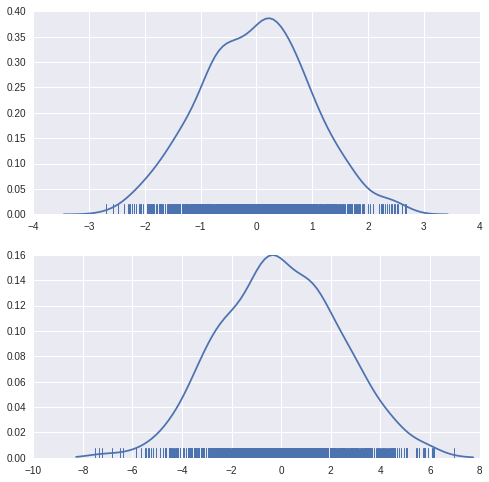

In [7]:
plt.figure(figsize=(8,8))
plt.subplot(211)
sns.distplot(z, hist=False, rug=True)
plt.subplot(212)
sns.distplot(pre_activation, hist=False, rug=True)

#z_series = pd.Series(z, )

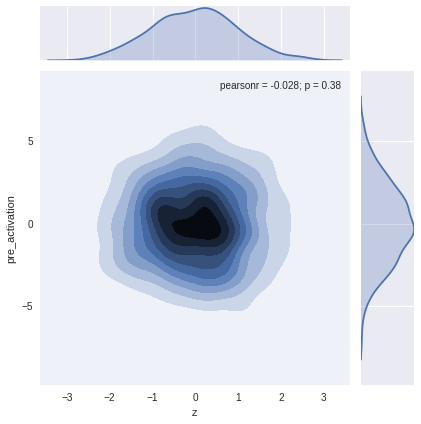

In [8]:
sns.jointplot(x='z', y='pre_activation', data=df, kind="kde")

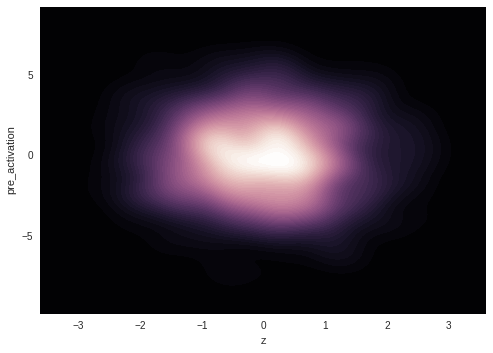

In [9]:
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.z, df.pre_activation, cmap=cmap, n_levels=60, shade=True)

In [10]:
df['tanh'] = tanh(df.pre_activation.values)
df['sigmoid'] = sigmoid(df.pre_activation.values)
df['relu'] = relu(df.pre_activation.values)
df['lrelu'] = leaky_relu(df.pre_activation.values)
df['dtanh_dx'] = dtanh_dx(df.pre_activation.values)
df['dsigmoid_dx'] = dsig_dx(df.pre_activation.values)
df['drelu_dx'] = drelu_dx(df.pre_activation.values)
df['dlrelu_dx'] = dlrelu_dx(df.pre_activation.values)

In [11]:
print(df.head(5))


   pre_activation         z      tanh   sigmoid  relu     lrelu  dtanh_dx  \
0       -0.592973 -0.125330 -0.532030  0.355953     0 -0.059297  0.716944   
1       -0.933737 -0.551572 -0.732332  0.282167     0 -0.093374  0.463690   
2       -3.018977 -1.274262 -0.995238  0.046576     0 -0.301898  0.009500   
3       -1.689623 -0.271805 -0.934099  0.155825     0 -0.168962  0.127459   
4       -0.128157  2.036518 -0.127460  0.468005     0 -0.012816  0.983754   

   dsigmoid_dx  drelu_dx  dlrelu_dx  
0     0.229250         0        0.1  
1     0.202549         0        0.1  
2     0.044407         0        0.1  
3     0.131544         0        0.1  
4     0.248976         0        0.1  


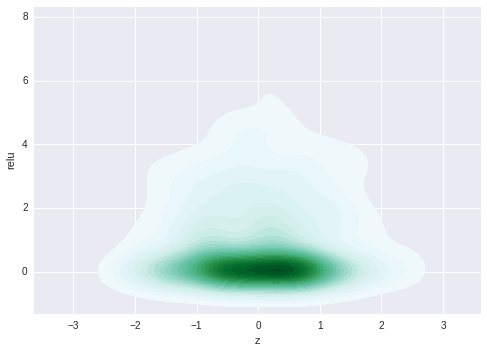

In [12]:
sns.kdeplot(df.z, df.relu, shade=True, shade_lowest=False, bw='scott', n_levels=25)

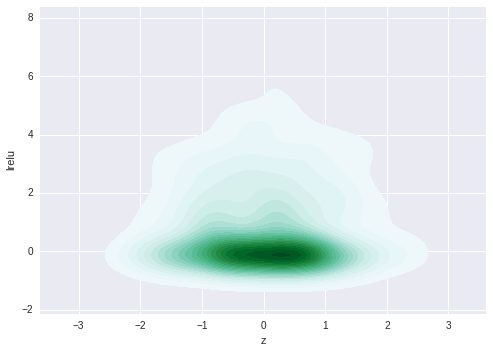

In [13]:
sns.kdeplot(df.z, df.lrelu, shade=True, shade_lowest=False, bw='scott', n_levels=25)

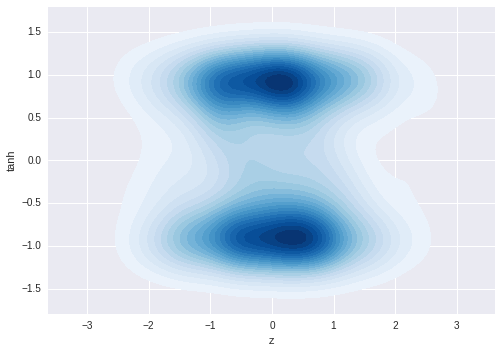

In [14]:
sns.kdeplot(df.z, df.tanh, cmap="Blues", shade=True, shade_lowest=False, bw='scott', n_levels=25)

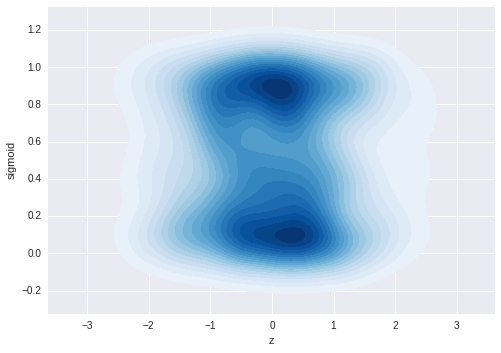

In [15]:
sns.kdeplot(df.z, df.sigmoid, cmap="Blues", shade=True, shade_lowest=False, bw='scott', n_levels=25)

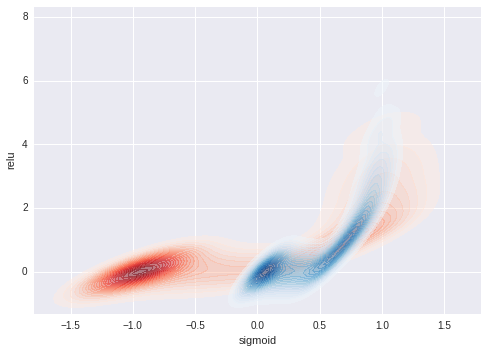

In [16]:
ax = sns.kdeplot(df.tanh, df.relu, cmap="Reds", shade=True, shade_lowest=False, alpha=0.5, bw='scott', n_levels=25)
ax = sns.kdeplot(df.sigmoid, df.relu, cmap="Blues", shade=True, shade_lowest=False, alpha=0.5, bw='scott', n_levels=25)

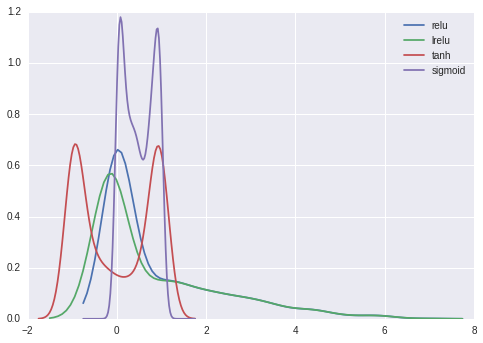

In [17]:
ax = sns.kdeplot(df.relu, bw='scott')
ax = sns.kdeplot(df.lrelu, bw='scott')
ax = sns.kdeplot(df.tanh, bw='scott')
ax = sns.kdeplot(df.sigmoid, bw='scott')

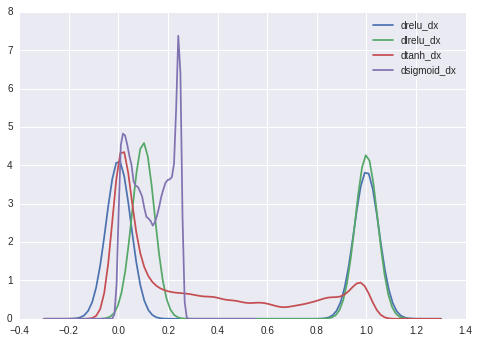

In [18]:
ax = sns.kdeplot(df.drelu_dx, bw=0.1)
ax = sns.kdeplot(df.dlrelu_dx, bw=0.1)
ax = sns.kdeplot(df.dtanh_dx, bw=0.1)
ax = sns.kdeplot(df.dsigmoid_dx, bw=0.1)